In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
datafile = 'data/ex1data1.txt'
data = np.loadtxt(datafile, delimiter = ',', unpack=True)
X = np.transpose(data[:-1])
Y = np.transpose(data[-1:])
m = Y.size
#Insert constant column 1
X = np.insert(X, 0, values= 1, axis= 1)
print(m)

97


1. Plotting the data

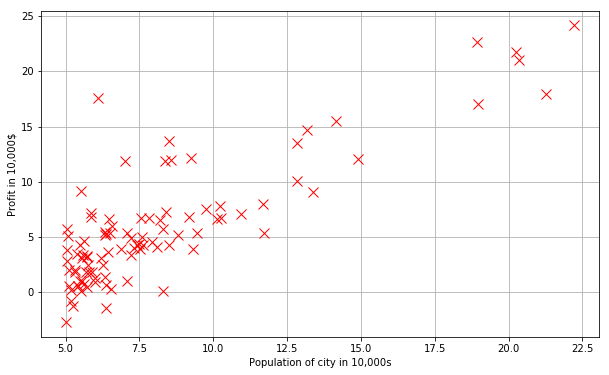

In [3]:
plt.figure(figsize=(10,6))
#Plot X and Y
plt.plot(X[:,1], Y[:,0], 'rx', markersize = 10)
plt.grid(True)
plt.ylabel('Profit in 10,000$')
plt.xlabel('Population of city in 10,000s')

2. compute Cost function

In [4]:
#h(theta)
def h(theta, X):
    return np.dot(X, theta)

#Cost function
def computeCost(theta, X, Y):
    """
    theta is a n-dimentional vector
    X is m*n matrix
    Y is m*1 matrix
    """
    J = float(1./2./m * np.dot((h(theta,X) - Y).T, (h(theta,X) - Y)))
    return J

theta = np.zeros((X.shape[1],1))

#cost should be 32.07
computeCost(theta,X,Y)

32.07273387745567

3. Gradient descent 

In [5]:
def gradientDescent(theta, X, Y, alpha, iteration):
    new_theta = theta
    Jvec = []
    theta_vec = []
    for i in range(iteration):
        theta_vec.append(list(new_theta[:,0]))
        J = computeCost(theta, X, Y)
        Jvec.append(J)
        for j in range(len(theta)):
            new_theta[j] = theta[j] - float(alpha/m*np.sum((h(theta, X) - Y)*X[:,j].reshape(X.shape[0],1)))
        theta = new_theta
    return theta, Jvec, theta_vec

(4, 8)

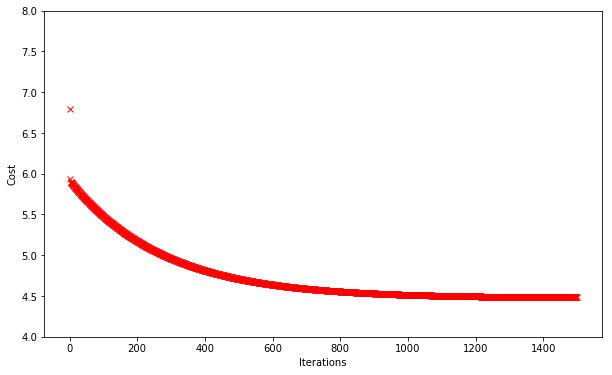

In [6]:
#running gradient descent and visualizing J
theta = np.zeros((X.shape[1],1))
theta, Jvec, theta_vec = gradientDescent(theta, X, Y, alpha = 0.01, iteration = 1500)
plt.figure(figsize = (10,6))
plt.plot(range(1500),Jvec, 'rx')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.ylim([4,8])

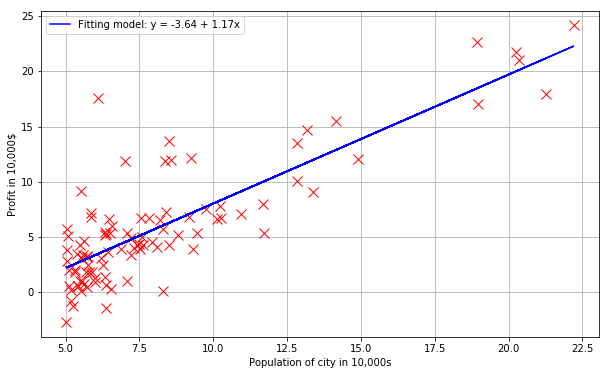

In [7]:
#draw fitting line onto the data
def myFit(theta,X):
    y = h(theta,X)
    return y
plt.figure(figsize=(10,6))
plt.plot(X[:,1],Y,'rx',markersize = 10)
predict = myFit(theta, X)
plt.plot(X[:,1],predict, 'b-', label = 'Fitting model: y = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.grid(True)
plt.ylabel('Profit in 10,000$')
plt.xlabel('Population of city in 10,000s')
plt.legend()

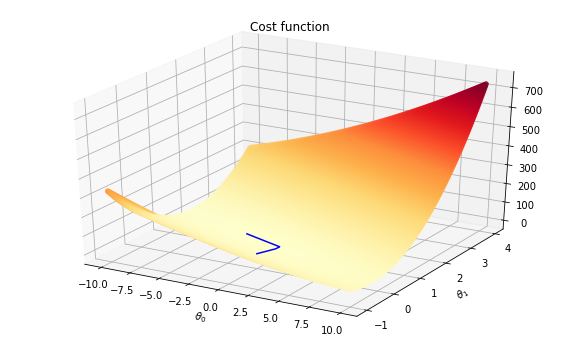

In [17]:
### 3d plot visualizing cost
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = '3d')

x = np.arange(-10, 10, 0.1)
y = np.arange(-1, 4, 0.025)
x_y = np.stack(np.meshgrid(x,y),-1).reshape(-1,2)
z = np.array([computeCost(x_y[i,:].reshape(2,1),X,Y) for i in range(x_y.shape[0])])
x = x_y[:,0]
y = x_y[:,1]

ax.scatter(x,y,z,c=np.abs(z),cmap=plt.get_cmap('YlOrRd'))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Cost function')
plt.plot(np.array(theta_vec)[:,0], np.array(theta_vec)[:,1], Jvec, 'b-')
plt.show()

Feature Normalization

In [18]:
def featureNormalize(x):
    x_mean = []
    x_std = []
    for i in range(x.shape[1]):
        x_mean.append(np.mean(x[:,i]))
        x_std.append(np.std(x[:,i]))
        x[:,i] = (x[:,i] - x_mean[i])/x_std[i]
    return x, x_mean, x_std


In [68]:
datafile2 = 'data/ex1data2.txt'
data2 = np.loadtxt(datafile2, delimiter = ',')
X = data2[:,:-1]
Y = data2[:,-1].reshape(X.shape[0],1)
m = Y.size

<function matplotlib.pyplot.show>

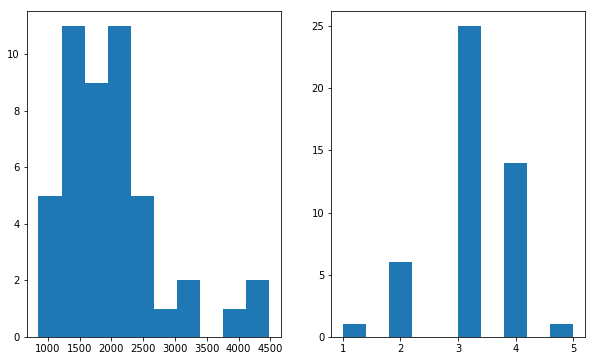

In [69]:
#data visualization
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(X[:,0])
plt.subplot(122)
plt.hist(X[:,1])
plt.show

In [70]:
X, X_mean, X_std = featureNormalize(X)
X = np.hstack([np.ones([m,1]), X])

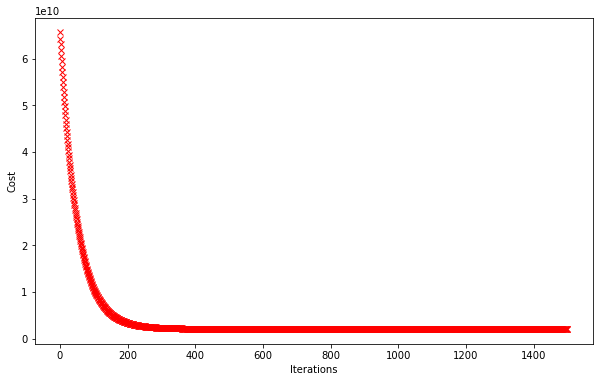

In [73]:
#running gradient descent and visualizing J
theta = np.zeros((X.shape[1],1))
theta, Jvec, theta_vec = gradientDescent(theta, X, Y, alpha = 0.01, iteration = 1500)
plt.figure(figsize = (10,6))
plt.plot(range(1500),Jvec, 'rx')
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [91]:
#check test data
x_test = np.array([1650,3])
x_test_scale = [(x_test[x] - X_mean[x])/X_std[x] for x in range(x_test.size)]
x_test_scale.insert(0,1)
print('Price of a house of 1650 sqrt with 3 rooms is $%0.2f '%float(h(theta, x_test_scale)))

Price of a house of 1650 sqrt with 3 rooms is $293098.15 
